<a href="https://colab.research.google.com/github/RahulKujur094/Machine_Learning_Core/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

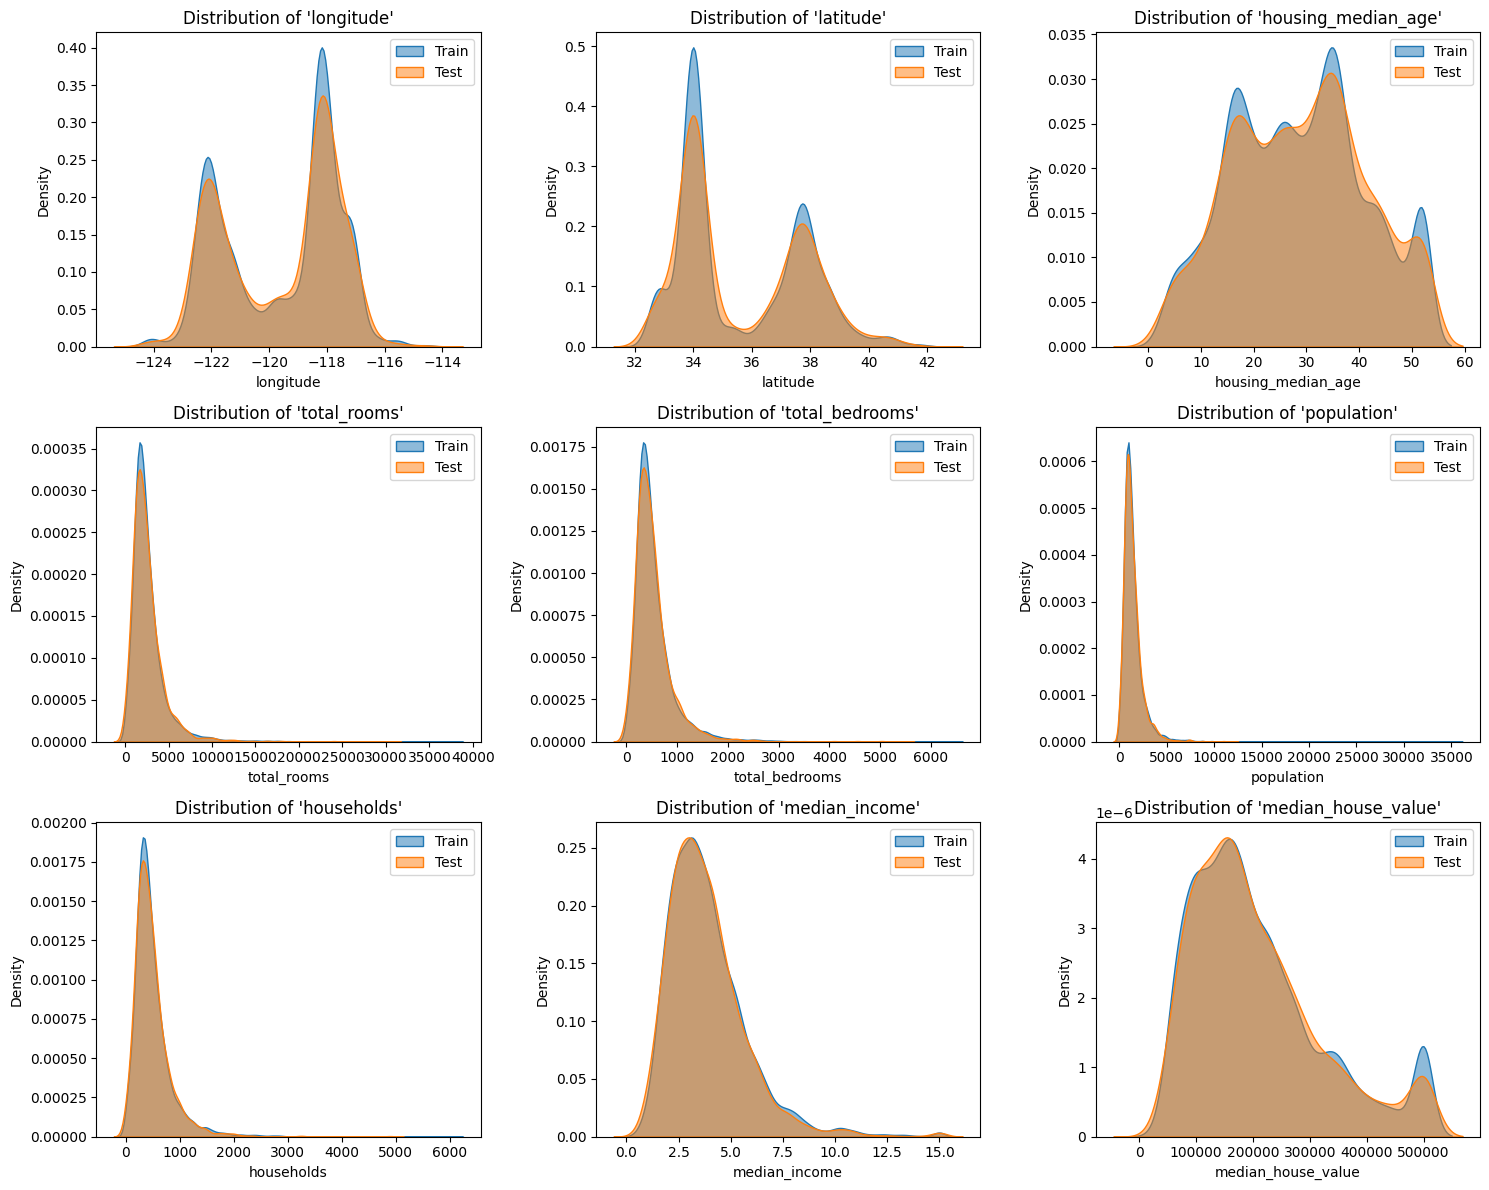

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')

def plot_train_test_distribution(train_df, test_df, cols=None, n_cols=3, figsize=(15, 12)):
    """
    Plots distribution of train vs test data for given columns.
    Automatically detects numeric vs categorical features.
    """
    if cols is None:
        # Pick common columns between train & test
        cols = list(set(train_df.columns).intersection(set(test_df.columns)))

    n_rows = (len(cols) + n_cols - 1) // n_cols
    plt.figure(figsize=figsize)

    for idx, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, idx)

        if pd.api.types.is_numeric_dtype(train_df[col]):
            sns.kdeplot(train_df[col], label='Train', fill=True, alpha=0.5)
            sns.kdeplot(test_df[col], label='Test', fill=True, alpha=0.5)
        else:
            # Handle categorical columns
            train_counts = train_df[col].value_counts(normalize=True)
            test_counts = test_df[col].value_counts(normalize=True)
            combined = pd.concat([
                pd.DataFrame({'Value': train_counts.index, 'Frequency': train_counts.values, 'Dataset': 'Train'}),
                pd.DataFrame({'Value': test_counts.index, 'Frequency': test_counts.values, 'Dataset': 'Test'})
            ])
            sns.barplot(x='Value', y='Frequency', hue='Dataset', data=combined)

        plt.title(f"Distribution of '{col}'")
        plt.legend()
        plt.tight_layout()

    plt.show()

# ============================
# Example usage:
# ============================
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# You can also specify specific columns manually if you want:
# cols = ['age', 'salary', 'target']

plot_train_test_distribution(train, test, cols=numeric_cols)

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


/tmp/ipython-input-3787904929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


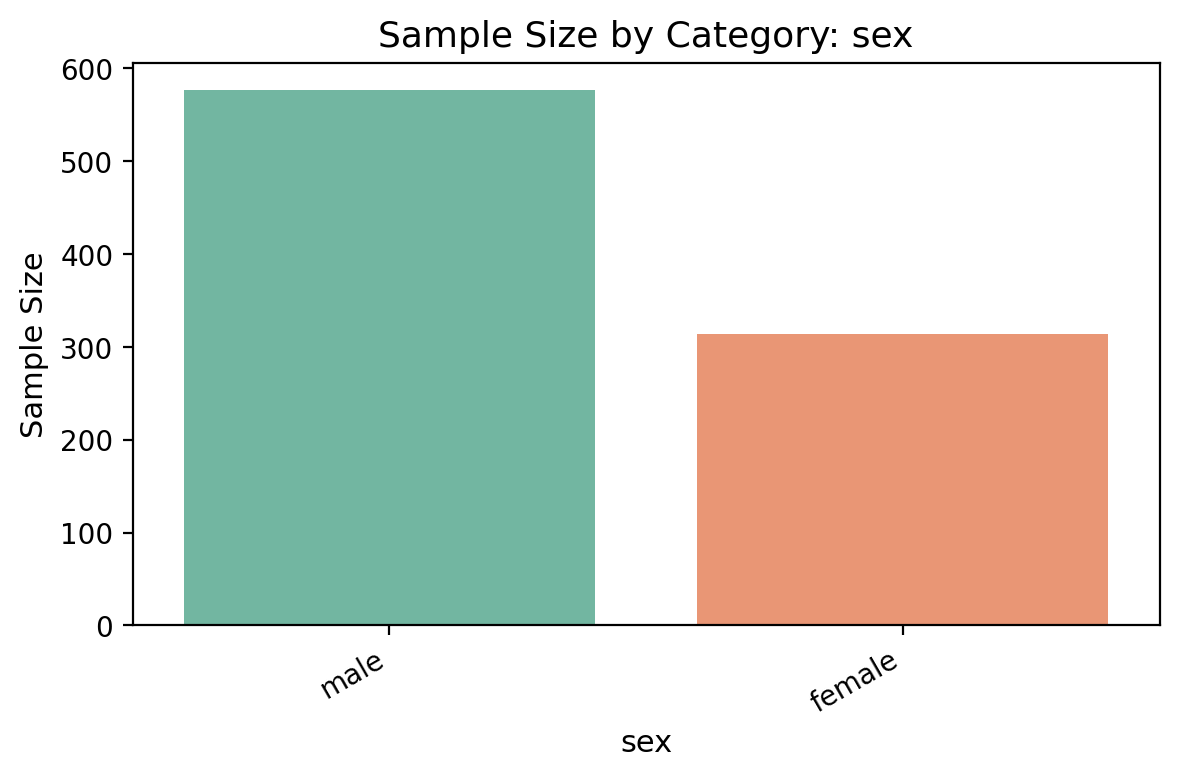

/tmp/ipython-input-3787904929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


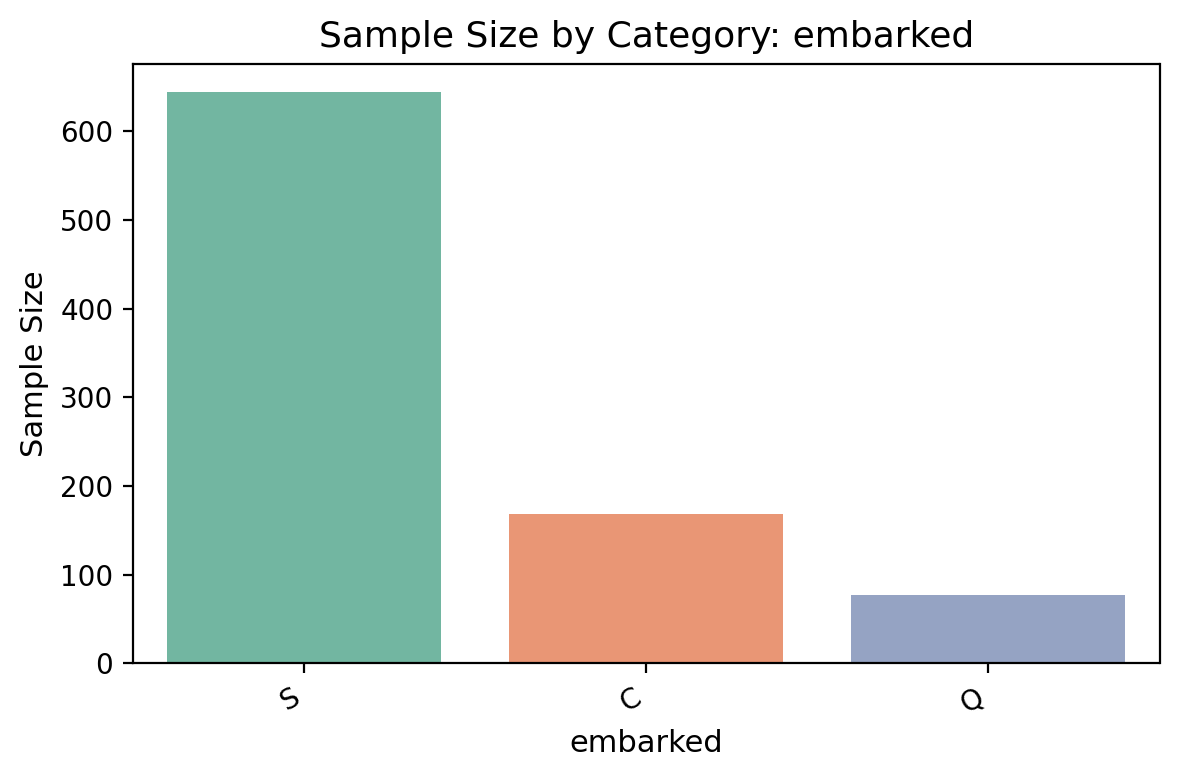

/tmp/ipython-input-3787904929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


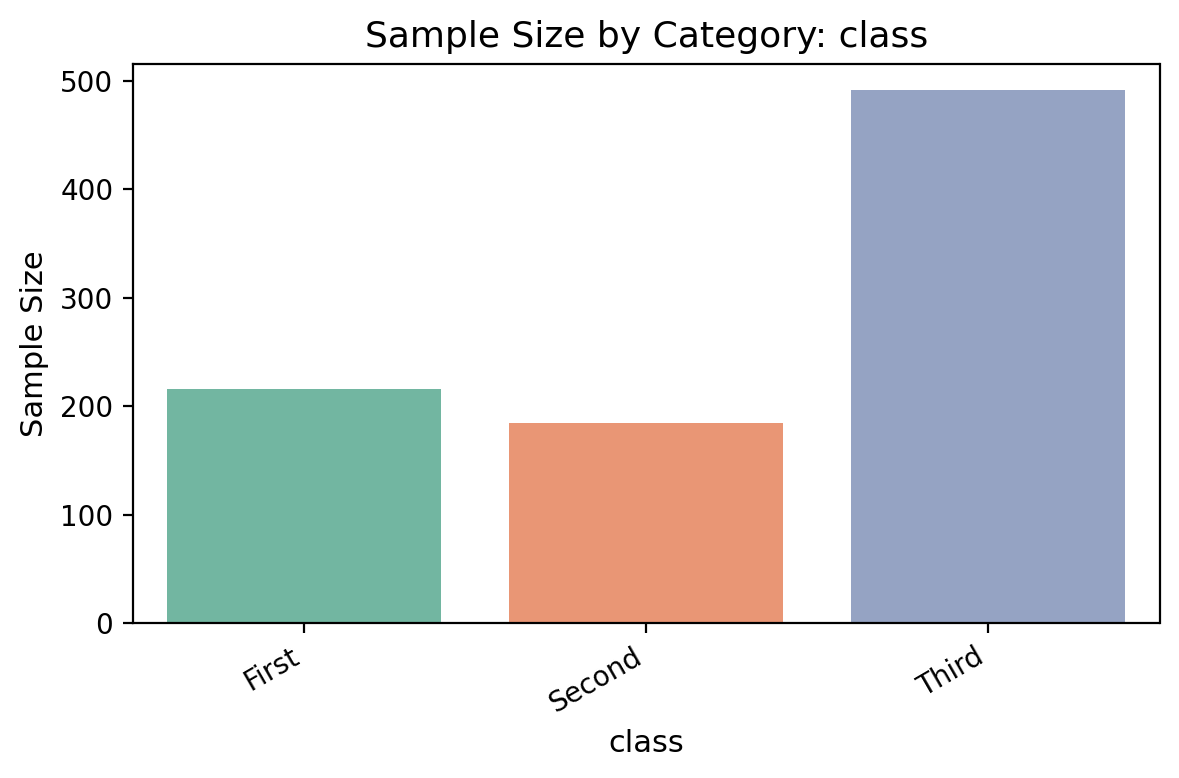

/tmp/ipython-input-3787904929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


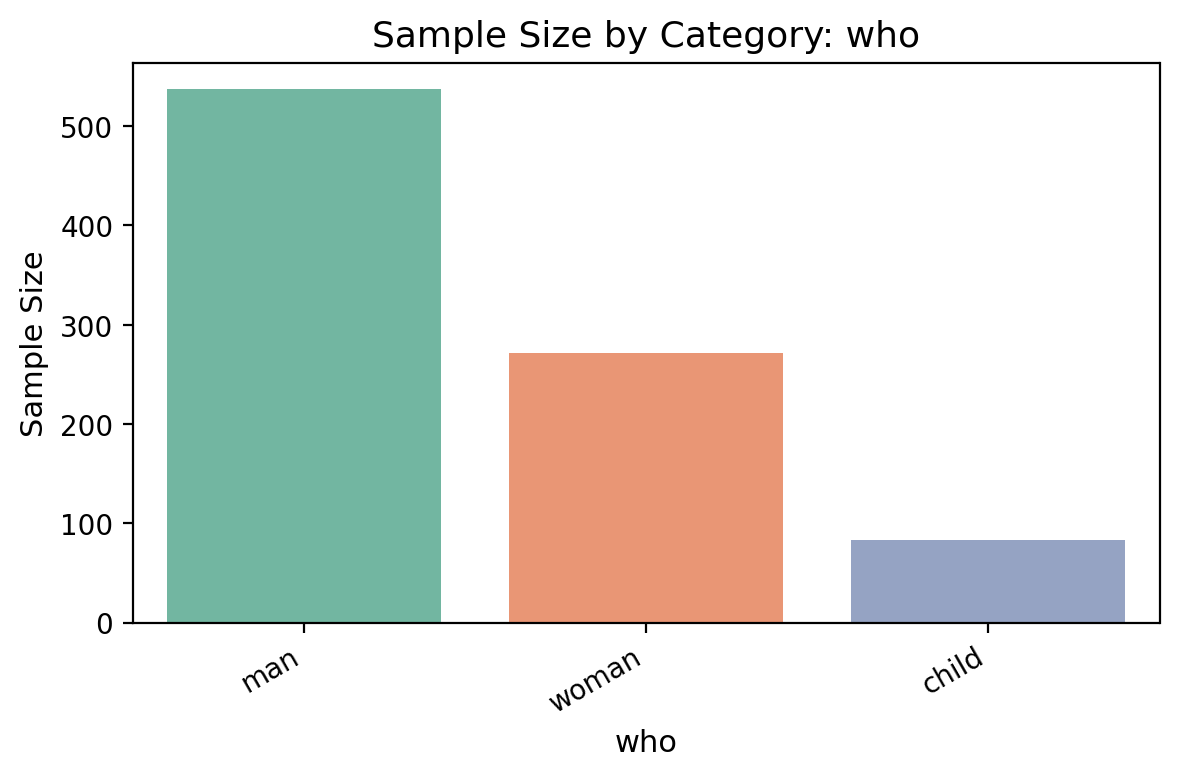

/tmp/ipython-input-3787904929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


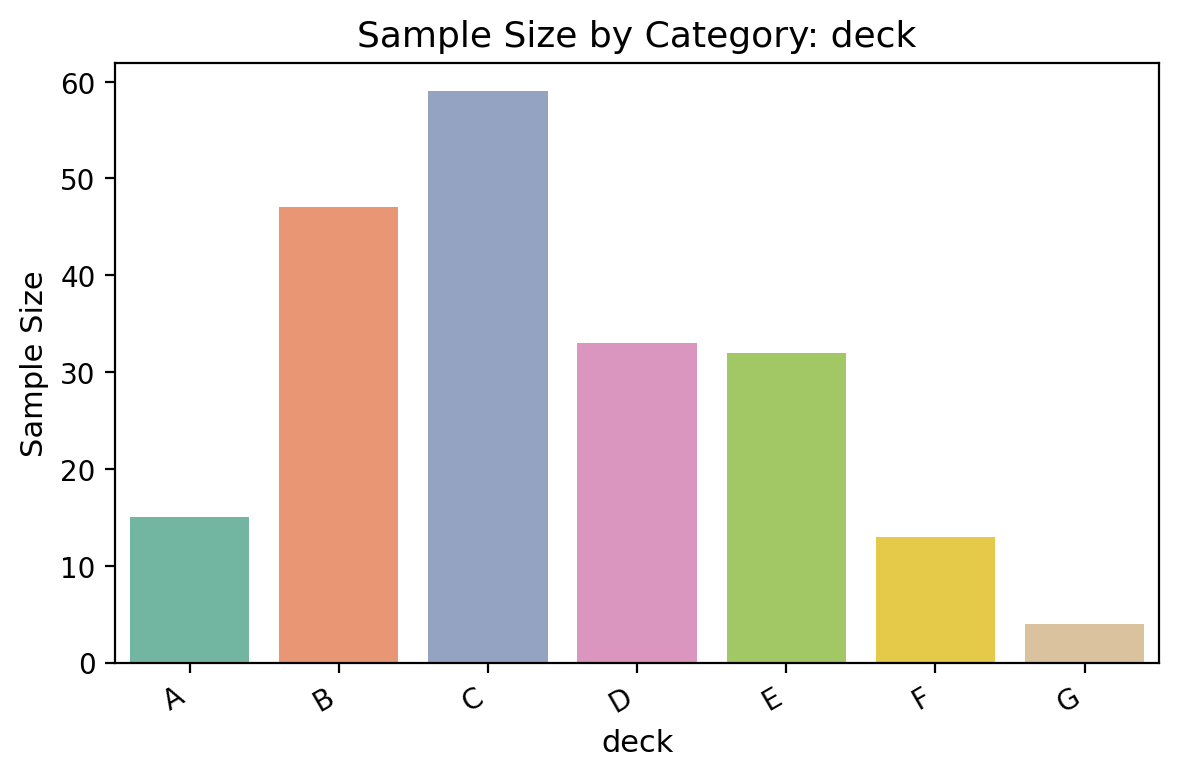

/tmp/ipython-input-3787904929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


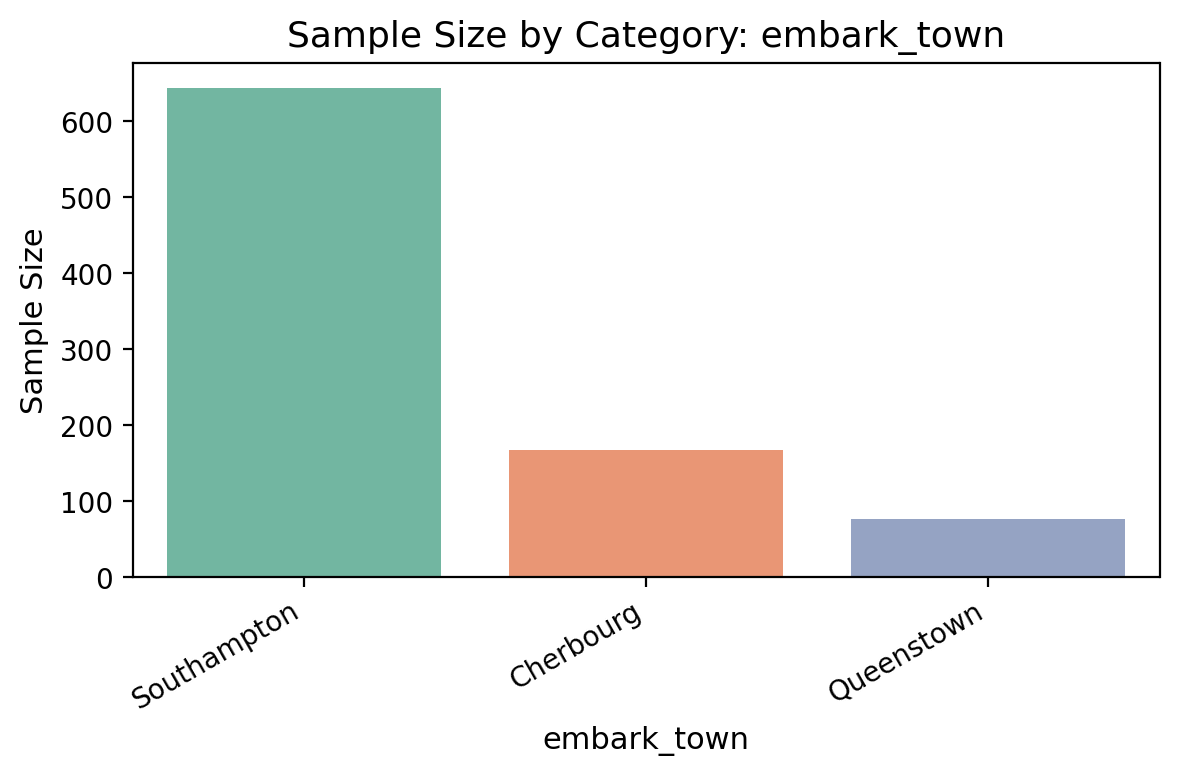

/tmp/ipython-input-3787904929.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


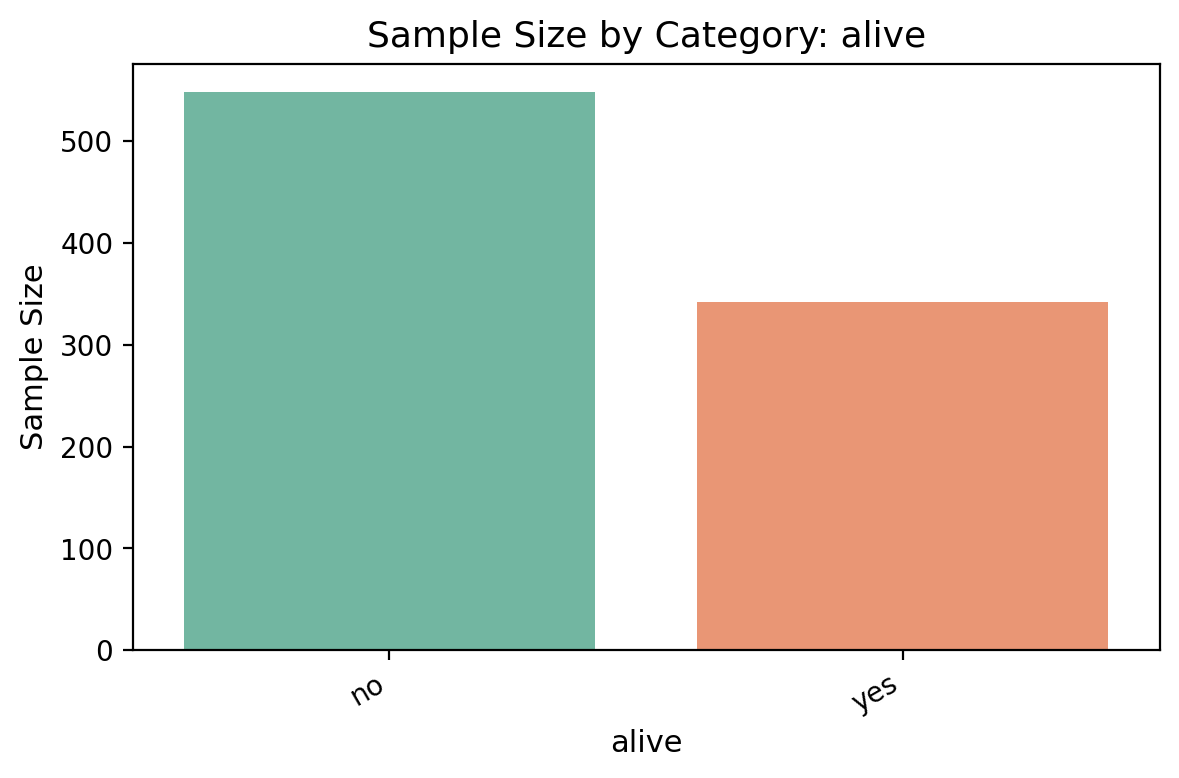

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# High-resolution plots for Jupyter Notebook
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load Titanic dataset
df = sns.load_dataset("titanic")
print(df.head())

# Select only categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Plot countplots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Sample Size by Category: {col}", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Sample Size", fontsize=11)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


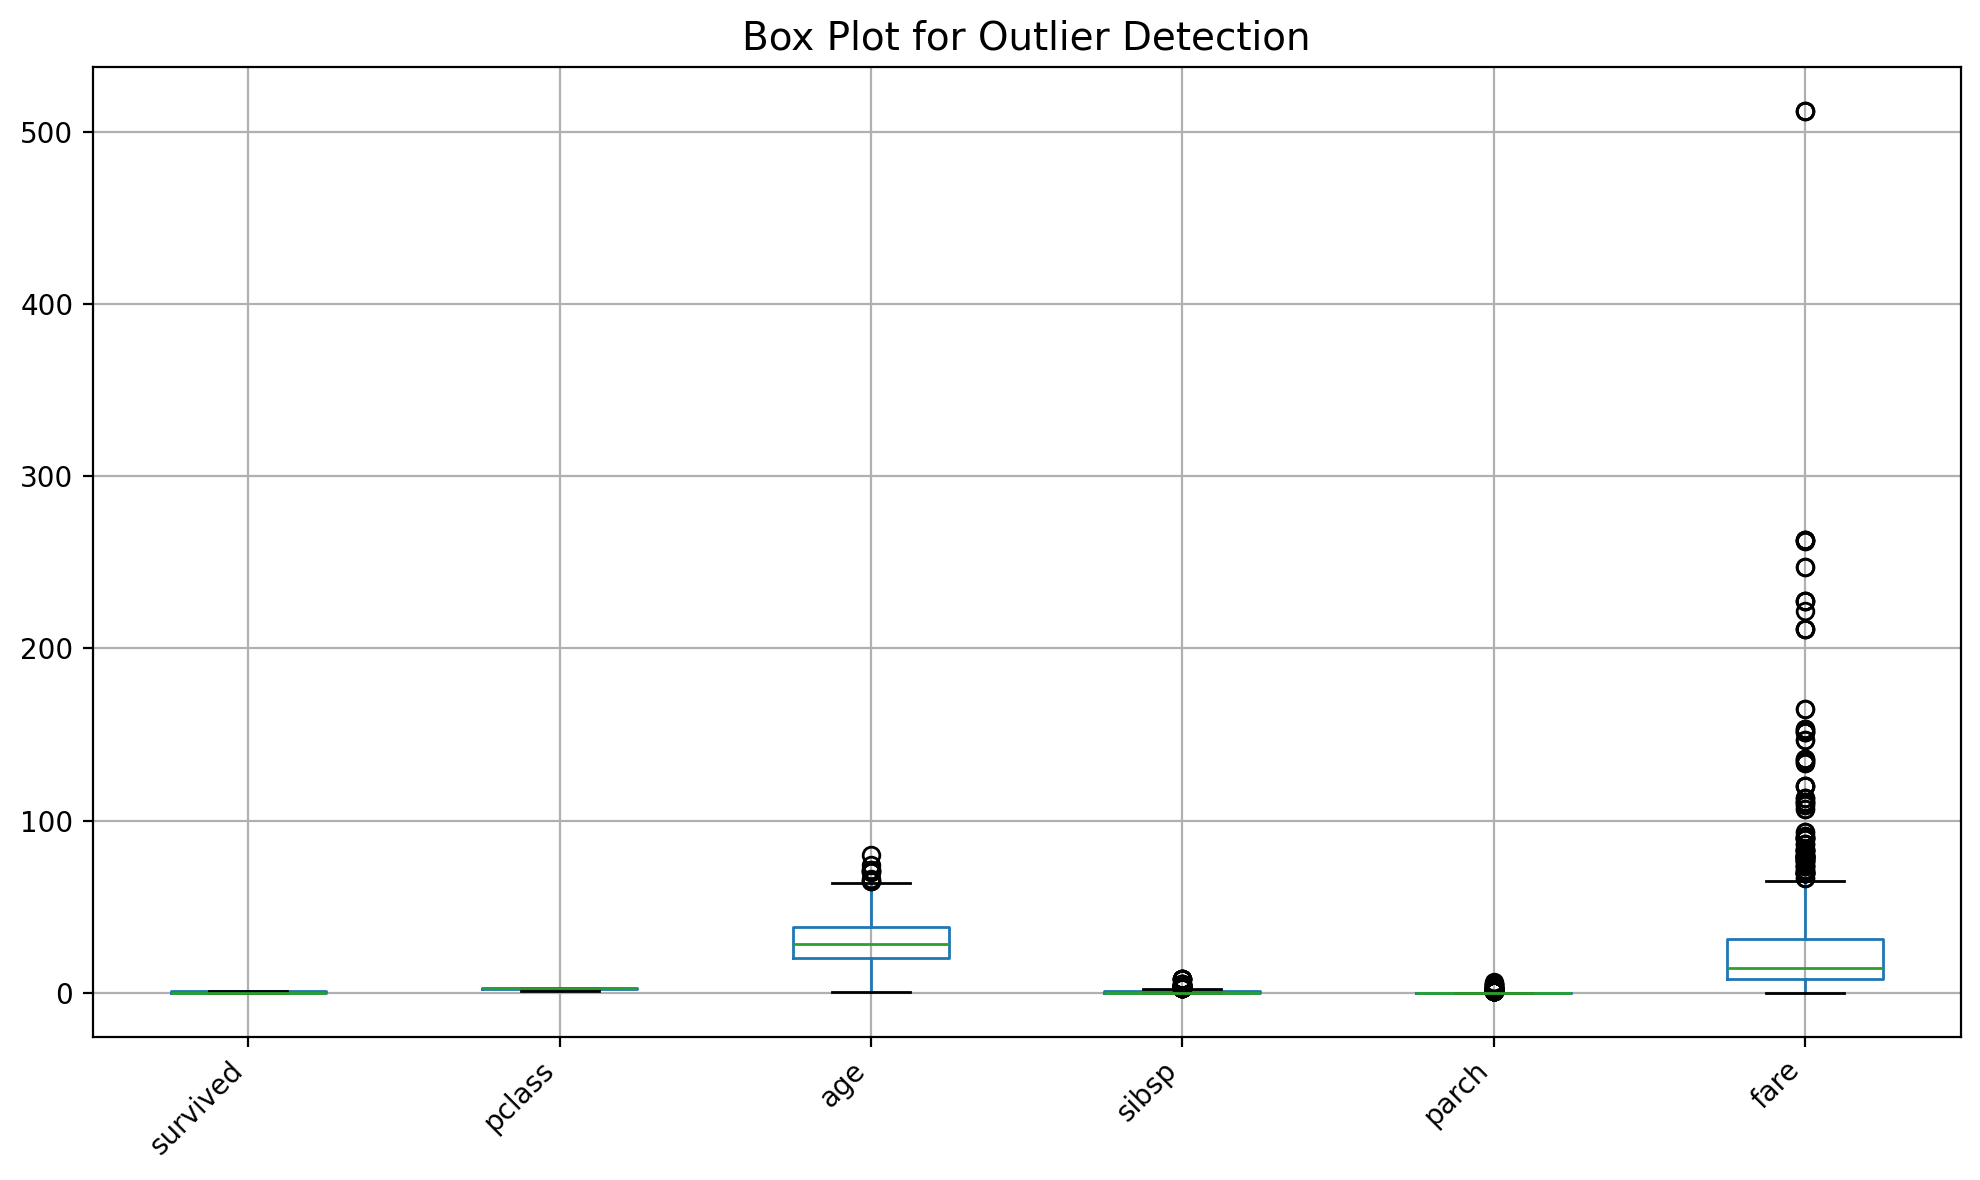

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset (Titanic)
df = sns.load_dataset("titanic")

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numerical columns
plt.figure(figsize=(10, 6))
df[num_cols].boxplot()
plt.title("Box Plot for Outlier Detection", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


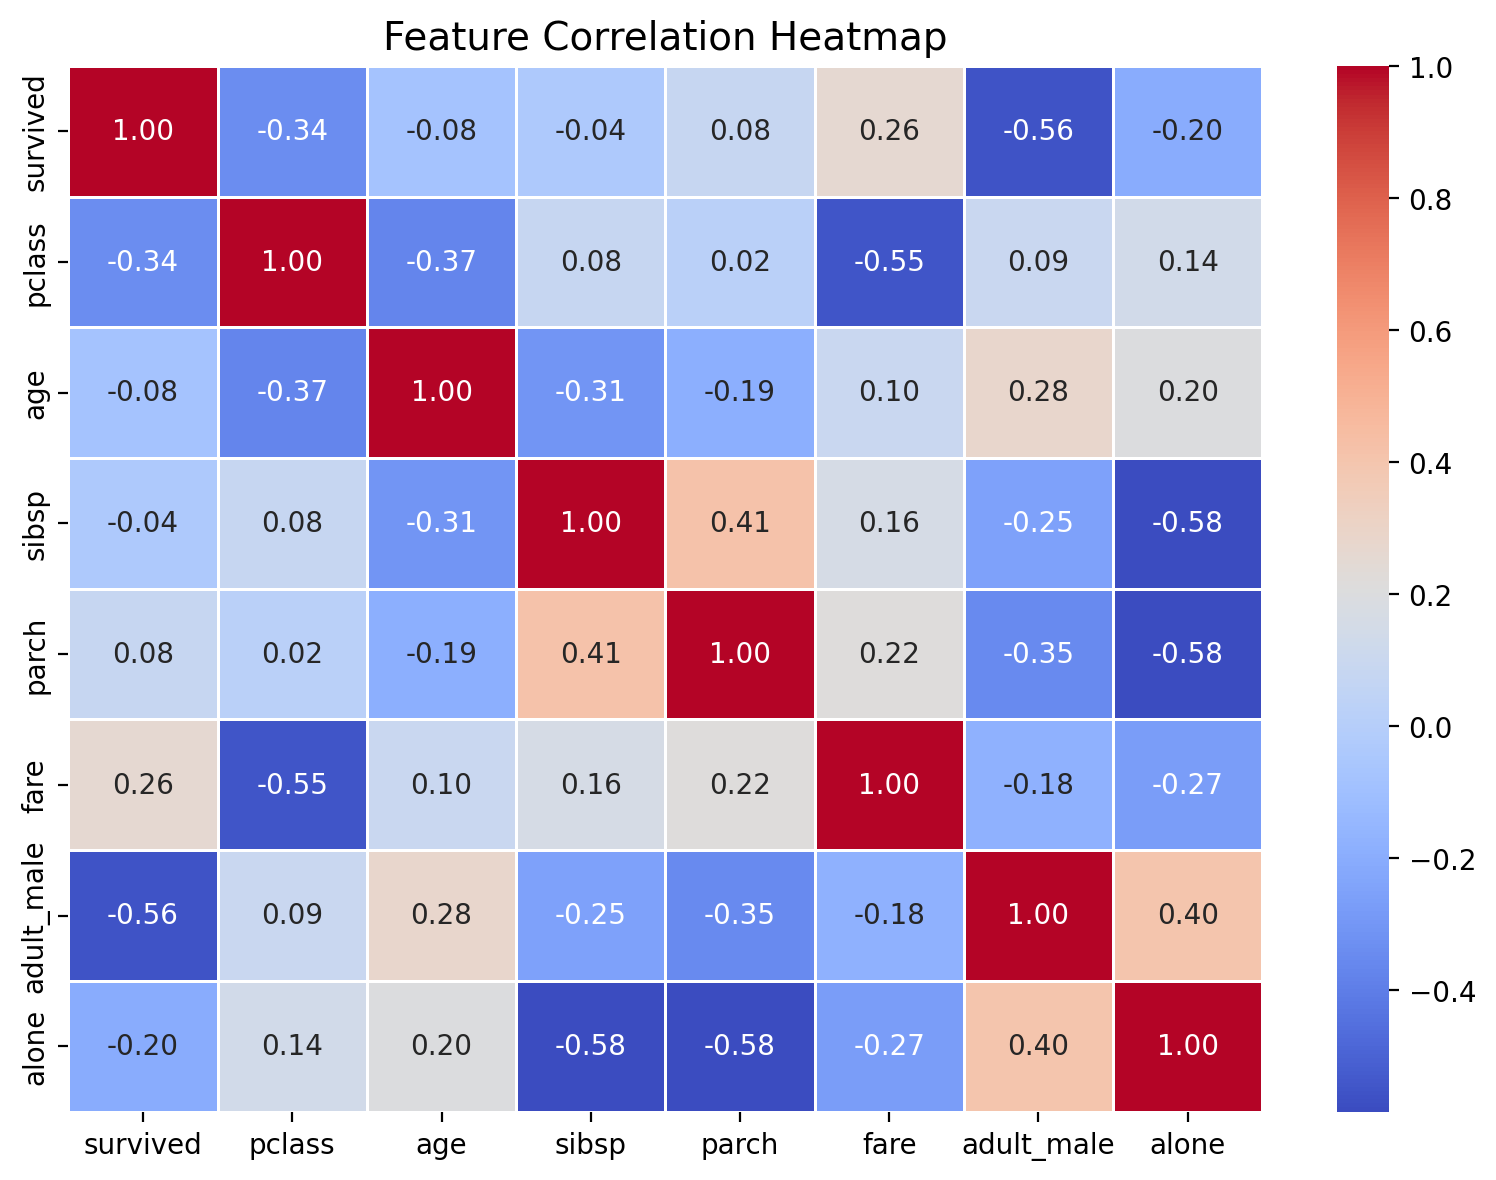

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset
df = sns.load_dataset("titanic")

# Compute correlation matrix (only for numerical columns)
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()
